<a href="https://colab.research.google.com/github/dlarsson2000/ML4BiotechProject/blob/main/CB206V_Project_Drug_repurposing%20LATEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 652.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.3 MB/s eta 0:00:00
   ━━

In [2]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [25]:
dataset = pd.read_csv('https://raw.githubusercontent.com/dlarsson2000/ML4BiotechProject/main/grk2_fp_data.csv')
df_X = dataset.drop(columns=['chembl_id', 'canonical_smiles', 'bioactivity'])
model = setup(data = df_X, target = 'pIC50', train_size=0.8, fold=5)

,Description,Value
0,Session id,8832
1,Target,pIC50
2,Target type,Regression
3,Original data shape,"(312, 1025)"
4,Transformed data shape,"(312, 1025)"
5,Transformed train set shape,"(249, 1025)"
6,Transformed test set shape,"(63, 1025)"
7,Numeric features,1024
8,Preprocess,True
9,Imputation type,simple


In [26]:
br = create_model('br', return_train_score=True, fold=5)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
print(br)


BayesianRidge()


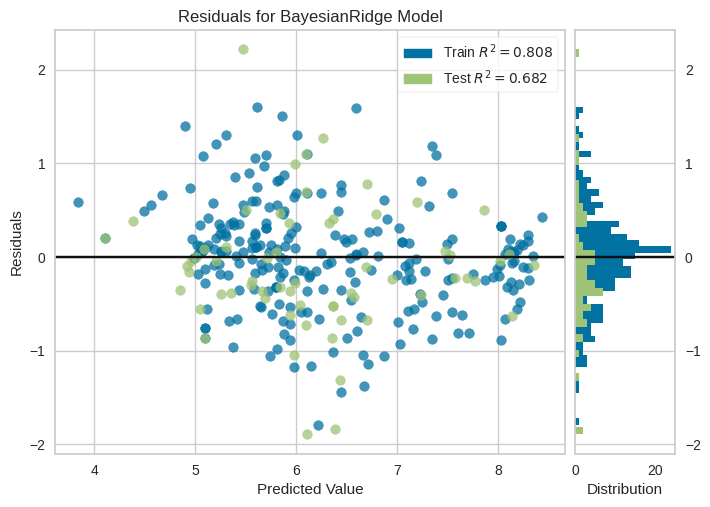

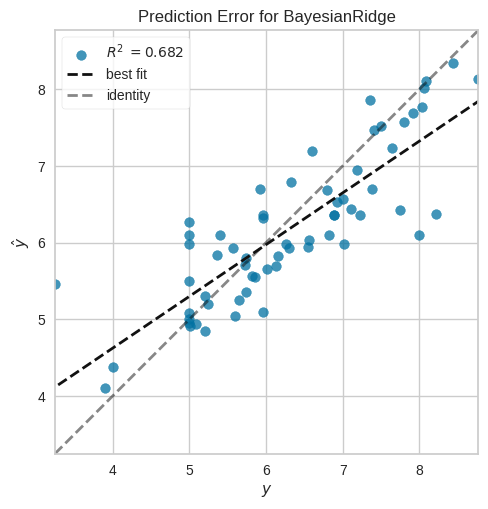

In [28]:


plot_model(br, 'residuals')

plot_model(br, 'error')


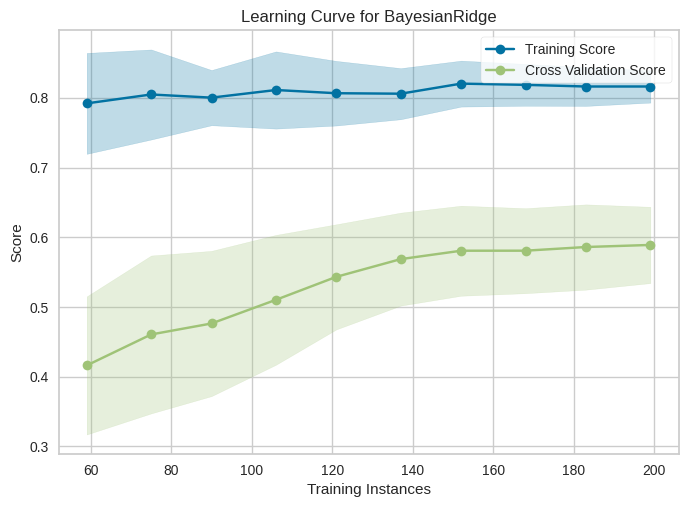

In [29]:
plot_model(br, plot = 'learning')

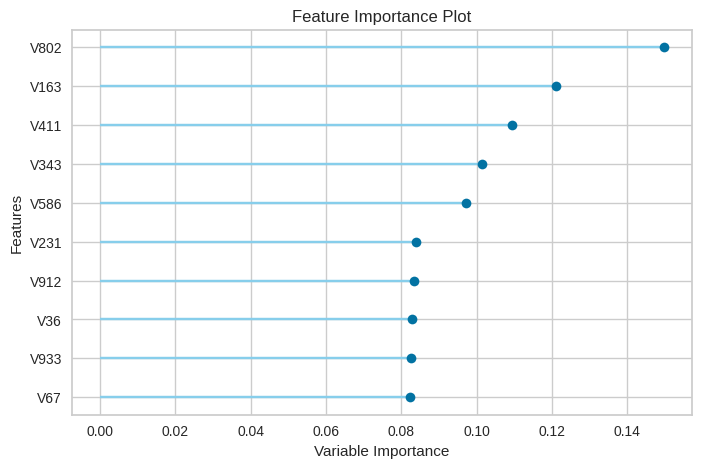

In [30]:
plot_model(br, 'feature')

In [31]:
prediction_holdout = predict_model(br)

prediction_holdout.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.4942,0.4501,0.6709,0.6822,0.0981,0.0833


,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028,pIC50,prediction_label
73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8.080922,8.108856
213,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,7.356547,7.856971
144,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.920819,6.535362
216,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,7.494850,7.516348
297,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.744728,6.427362


In [32]:
header = ["pIC50", "prediction_label"]
prediction_holdout.to_csv('holdout_prediction_data_raw.csv', index=False, columns = header)


In [ ]:
! cat holdout_prediction_data_raw.csv

pIC50,prediction_label
6.4317985,7.4717449095432205
6.180456,5.527809438742703
8.09691,8.005112477116786
6.823909,5.565821057566029
8.113509,8.411730534553406
8.124939,7.570342135818393
5.7447276,6.909640197999009
6.468521,6.010634024051898
5.669586,5.019309542018409
6.552842,5.930156946681136
7.7212462,6.646795671778206
5.191789,5.406025821683595
5.860121,5.5802938926535575
8.004365,6.905373913612094
4.0,5.913798551466144
5.0,5.331973794196012
8.113509,8.343190530908537
6.60206,7.1233883582956
4.701147,5.536620016064334
5.823909,5.617054497466347
8.107905,7.9905578482990585
3.5000381,5.454731921606579
7.376751,7.424345206126755
8.0,6.486227407320363
5.0,7.300994501022758
7.309804,5.48966887855727
8.408936,8.14598115542143
4.958607,6.058767346462808
6.275724,6.624748298291283
6.79588,6.663635663144114
8.69897,8.223789694569028
5.199283,5.354345361114654
6.6382723,5.798212874903632
5.0824943,5.354345361114654
5.5686364,5.948242819352425
8.107905,8.011767878433886
5.0,5.249534616804161
5

In [33]:
# read prediction data from file
dataset2 = pd.read_csv('https://raw.githubusercontent.com/dlarsson2000/ML4BiotechProject/main/drug_phaseIV_fp_data.csv')
dataset2.head(10)


,chembl_id,canonical_smiles,max_phase,name,V5,V6,V7,V8,V9,V10,...,V1019,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028
0,CHEMBL3833408,O=S(=O)([O-])[O-].O=S(=O)([O-])[O-].[Al+3].[Al...,4,MAGALDRATE,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL807,CC12CC3CC(C)(C1)CC(N)(C3)C2,4,MEMANTINE,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,CHEMBL30,CN/C(=N\CCSCc1nc[nH]c1C)NC#N,4,CIMETIDINE,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1201354,CC[N+](CC)(CC)CCC(O)(c1ccccc1)C1CCCCC1,4,TRIDIHEXETHYL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL453,Cc1noc(NS(=O)(=O)c2ccc(N)cc2)c1C,4,SULFISOXAZOLE,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,CHEMBL2109882,O=[Si](O)O[Si](O)(O)O[Si](=O)O,4,TRISILICATE,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,CHEMBL3,CN1CCC[C@H]1c1cccnc1,4,NICOTINE,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,CHEMBL1201286,CC[N+](C)(CC)CCOC(=O)C(O)(c1ccccc1)C1CCCCC1,Jan-00,OXYPHENONIUM,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,CHEMBL2105755,CC(C)(NC(=O)C1=C(O)[C@@H]2Oc3c(O)ccc4c3[C@@]23...,4,NALDEMEDINE,0,0,1,0,0,1,...,1,1,1,1,0,0,0,0,0,0
9,CHEMBL1568057,CC(C)NCC(O)c1cc(O)cc(O)c1.CC(C)NCC(O)c1cc(O)cc...,4,METAPROTERENOL SULFATE,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_new_X = dataset2.drop(columns=['name','chembl_id','canonical_smiles','max_phase'])
df_new_X.head(5)

,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V1019,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# predict on new data
prediction_newdata = predict_model(br, data = df_new_X)
prediction_newdata.head()


,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028,prediction_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.814123
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4.902898
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.622140
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.855739
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.931465


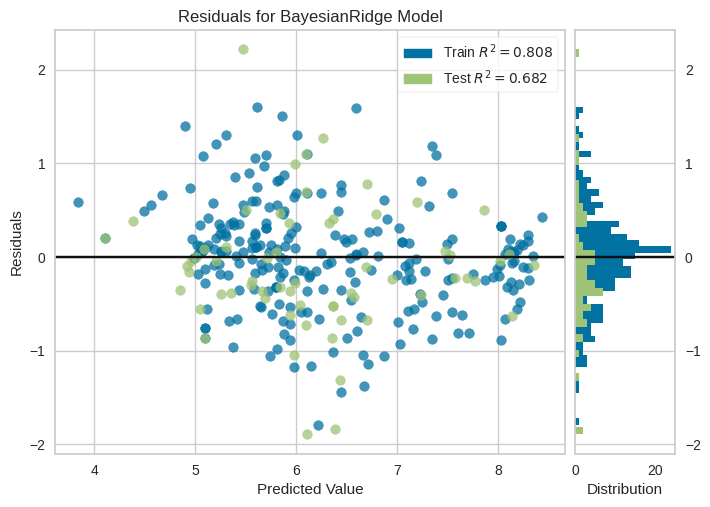

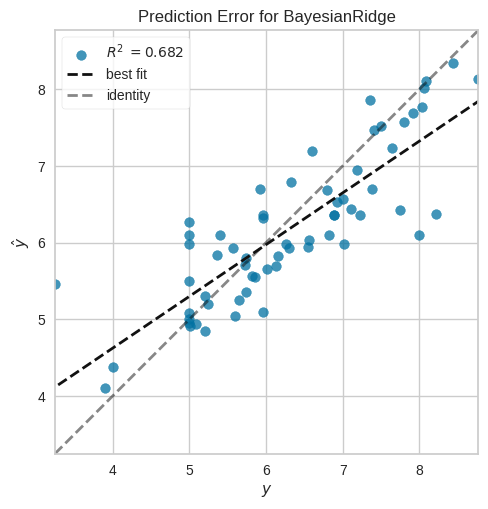

In [42]:
plot_model(br)

plot_model(br, 'error')

In [40]:
evaluate_model(br)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
#Visualize the data

#Take the names from the df_new
names = dataset2['name'].values
print(names[:5])
col_names = names.reshape(-1, 1) #making the row into a column
#print(col_names[:5])
predictions = prediction_newdata.prediction_label.values
print(predictions[:5])
col_predictions = predictions.reshape(-1, 1) #making the row into a column
#Vertically stack new arrays
pred_names = np.hstack((col_names, col_predictions))
print(pred_names[:5])

['MAGALDRATE' 'MEMANTINE' 'CIMETIDINE' 'TRIDIHEXETHYL' 'SULFISOXAZOLE']
[4.81412324 4.90289801 4.62213997 4.85573852 4.93146528]
[['MAGALDRATE' 4.81412323879363]
 ['MEMANTINE' 4.902898013600625]
 ['CIMETIDINE' 4.622139966444218]
 ['TRIDIHEXETHYL' 4.85573852275394]
 ['SULFISOXAZOLE' 4.931465276667333]]


In [38]:
#Select the top 20 values
# Convert the second column (values) to float for sorting
pred_names[:, 1] = pred_names[:, 1].astype(float)

# Sort the array by the second column (values) in descending order
sorted_array = pred_names[pred_names[:, 1].argsort()[::-1]]

# Select the top 20 rows (top 20 values and corresponding names)
top_20 = sorted_array[:20]

# Print the result
print(top_20)

[['BEROTRALSTAT' 6.976045908000053]
 ['OLODATEROL' 6.522553769511075]
 ['RIMONABANT' 6.412083042012569]
 ['TADALAFIL' 6.333984928265993]
 ['LIRAGLUTIDE' 6.27430990246307]
 ['PRAMLINTIDE' 6.247825795586126]
 ['EXENATIDE' 6.2242235300013835]
 ['ODEVIXIBAT' 6.194036478047922]
 ['RIFAMPIN' 6.183655969293172]
 ['SITAGLIPTIN' 6.156287057261933]
 ['DILTIAZEM' 6.117484952623107]
 ['IBUDILAST' 6.10330670665136]
 ['RIFAMYCIN' 6.075049388562666]
 ['PRANLUKAST' 6.055705513528078]
 ['ICATIBANT' 6.05059032058392]
 ['RIFAPENTINE' 6.041683293677174]
 ['VALBENAZINE' 5.962946040217998]
 ['RESERPINE' 5.916350149414722]
 ['RIFABUTIN' 5.912954323999808]
 ['MIRABEGRON' 5.904509759294871]]


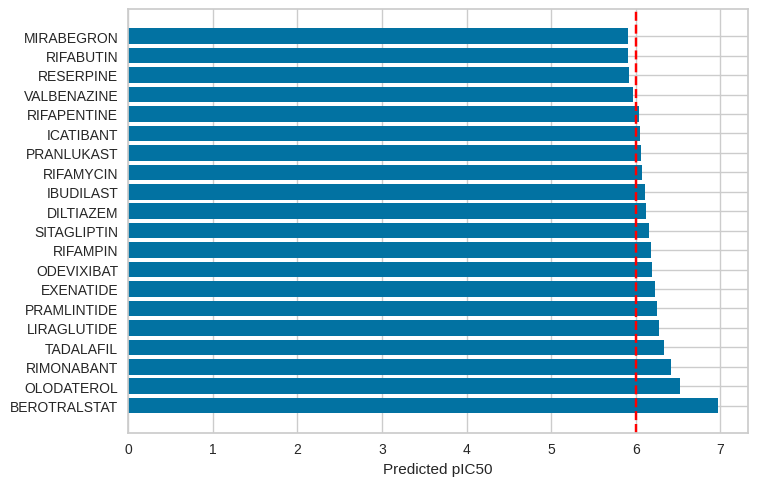

In [39]:
import matplotlib.pyplot as plt

# Select the first column for x-axis and the second column for y-axis
x_bar = top_20[:, 0]  # First column as x-axis
y_bar = top_20[:, 1]  # Second column as y-axis
threshold = 6

# Create a bar plot
plt.barh(x_bar, y_bar)

plt.xlabel('Predicted pIC50')

# Add a horizontal line for the threshold value
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')